<hr style="height:2px;border:none"/>
<img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">

<center>
    <h1> INF495 - Modelamiento Computacional Aplicado </h1>
    <h1> Desafío 2</h1>
    <h3>José Quezada</h3>
    <h3>Jorge Sanhueza</h3>
</center>
<br>
<hr style="height:2px;border:none"/>

In [2]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 6.2. Modeling multi-channel noise

In [32]:
np.random.seed(10)

#number of samples
n = 200

# hyperparameters
sigma = 0.3
mu = 1.1

# x_axis
xdata = np.arange(n)

# random distributions for each channel
ch1 = np.random.uniform(0, 2*np.pi, n)
ch2 = np.random.exponential(0.5, n)
ch3 = np.random.gamma(3,2,n)
ch4 = sigma * np.random.randn(n) + mu
ch5 = ch3 * ch1

channels=[ch1,ch2,ch3,ch4,ch5]

## Visualización de ruido

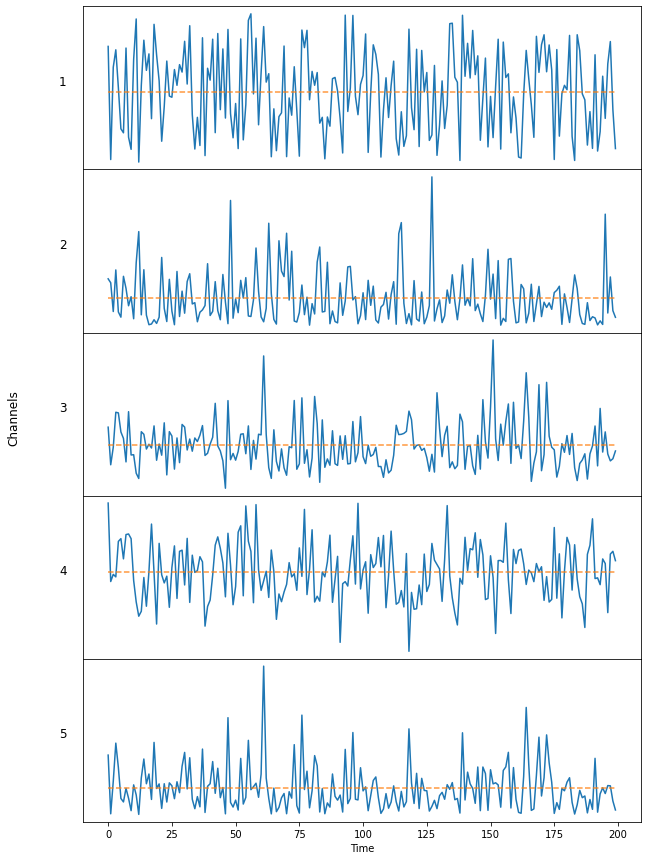

In [33]:
fig, ax = plt.subplots(5, figsize=(10,15))
plt.subplots_adjust(wspace=0,hspace=0)
yprops= dict(rotation='horizontal',labelpad=20,fontsize=12)
for i in range(len(channels)):
    ax[i].plot(xdata,channels[i])
    ax[i].plot(xdata,[np.mean(channels[i])]*n,'--',alpha=0.8,)
    ax[i].set_yticks([])
    ax[i].set_ylabel(f"{i+1}",**yprops)
    if i != len(channels)-1:
        ax[i].set_xticks([])

ax[len(channels)-1].set(xlabel="Time")
fig.supylabel('Channels')
plt.show()

## Matriz de dispersión

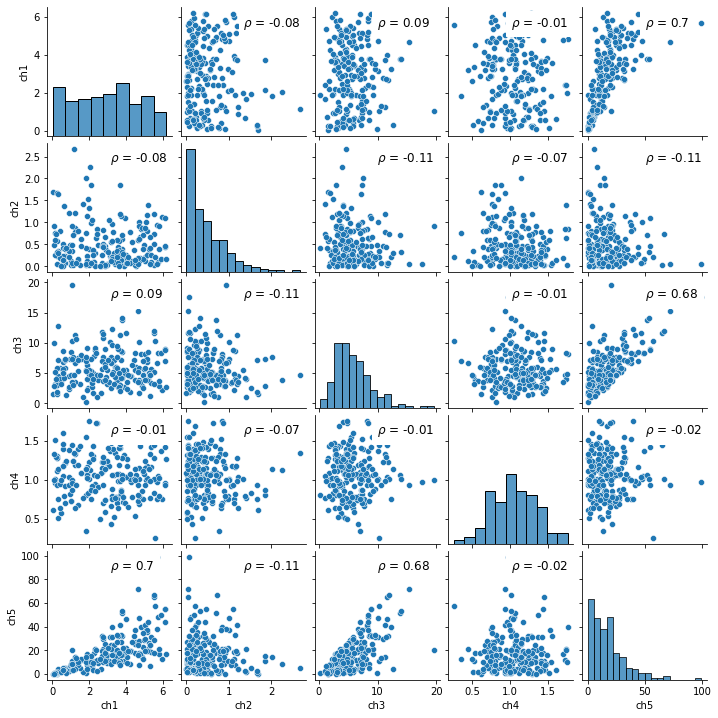

In [46]:
A=np.empty(shape=(n,5))
A[:,0]=ch1
A[:,1]=ch2
A[:,2]=ch3
A[:,3]=ch4
A[:,4]=ch5
df= pd.DataFrame(A,columns=["ch1","ch2","ch3", "ch4", "ch5"])

def corr(x, y, **kwargs):

    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.5, 0.85), backgroundcolor='white', size = 12, xycoords = ax.transAxes)

grid = sb.pairplot(df)
grid.fig.set_size_inches(10,10)
grid = grid.map_upper(corr)
grid = grid.map_lower(corr)